In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [77]:
X, y = make_regression(n_samples=1000, n_features=3)

In [78]:
X

array([[-1.04895931, -1.24286369,  1.29746576],
       [-1.07482395, -1.41079679, -0.6760564 ],
       [ 0.64748127, -0.48976832,  0.05160583],
       ...,
       [-0.0487217 ,  0.9618123 ,  0.1475852 ],
       [-1.83264151, -1.79722571, -1.75823487],
       [-0.16136738, -0.47620791,  0.52480751]])

In [79]:
y

array([-5.18277768e+01, -1.47074008e+02, -6.68921658e+00,  4.15484699e+01,
        2.97375770e+01, -6.18265625e+01,  6.97775954e+01, -1.56518873e+01,
       -1.48055844e+01, -1.50435330e+01,  1.38837104e+02, -5.35461419e+01,
        6.90002821e+01,  3.87703762e+01,  4.47349445e+01, -3.17680596e+01,
        4.60134041e+01,  6.09516402e+01, -3.37770389e+01,  9.47980736e+01,
       -7.59268238e+01, -6.72335018e+01,  7.48692541e+01, -3.91647304e+01,
       -3.15114451e+01, -4.46859375e+01,  1.06971074e+02,  1.21573595e+02,
        5.31091213e+01,  8.62424016e+01, -5.69663631e+01, -1.36175605e+02,
        8.42451962e+01,  4.07513918e+01, -2.61471548e+01, -6.24942149e+01,
        4.38349707e+01,  5.82024186e+01,  9.27644785e+01,  1.40258974e+02,
       -1.42781579e+01,  1.36089208e+02,  8.33811219e+01,  1.36178887e+02,
        7.19972559e+01, -9.92825835e+01,  1.70303222e+01,  1.99431014e+01,
        1.18680762e+01,  1.36257714e+02,  3.57007381e+01,  5.60944899e+01,
        3.08892098e+00, -

In [80]:
df = pd.DataFrame(X)

In [81]:
df['y_true'] = y

In [82]:
df['y_pred_0'] = df['y_true'].mean()

In [83]:
df.head()

,0,1,2,y_true,y_pred_0
0,-1.048959,-1.242864,1.297466,-51.827777,1.607154
1,-1.074824,-1.410797,-0.676056,-147.074008,1.607154
2,0.647481,-0.489768,0.051606,-6.689217,1.607154
3,0.205676,1.363184,-1.085319,41.548470,1.607154
4,0.480464,0.058849,0.259488,29.737577,1.607154


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
mean_absolute_error(df['y_true'], df['y_pred_0']) # В среднем моя модель ошибается на 73.4%

64.78775383517844

In [86]:
df['residual_0'] = df['y_true']-df['y_pred_0'] # Это остатки или ошибки.
#Т.е. это величина показывает, сколько нехватает предсказанию до реального значения

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
tree_1 = DecisionTreeRegressor(max_depth=1)

In [89]:
tree_1.fit(df[[0,1,2]],df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [90]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [91]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,-1.048959,-1.242864,1.297466,-51.827777,1.607154,-53.434930,-46.215708
1,-1.074824,-1.410797,-0.676056,-147.074008,1.607154,-148.681161,-46.215708
2,0.647481,-0.489768,0.051606,-6.689217,1.607154,-8.296370,-46.215708
3,0.205676,1.363184,-1.085319,41.548470,1.607154,39.941316,56.485865
4,0.480464,0.058849,0.259488,29.737577,1.607154,28.130423,-46.215708
...,...,...,...,...,...,...,...
995,0.039396,0.612746,-0.595301,12.410838,1.607154,10.803685,56.485865
996,0.832788,2.017587,0.814013,181.626622,1.607154,180.019469,56.485865
997,-0.048722,0.961812,0.147585,62.271094,1.607154,60.663941,56.485865
998,-1.832642,-1.797226,-1.758235,-240.303912,1.607154,-241.911066,-46.215708


In [92]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[1] <= 0.132\nsquared_error = 6457.442\nsamples = 1000\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 4117.83\nsamples = 550\nvalue = -46.216'),
 Text(0.75, 0.25, 'squared_error = 3515.78\nsamples = 450\nvalue = 56.486')]

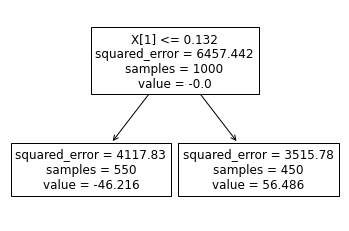

In [93]:
plot_tree(tree_1)

In [94]:
alpha = 0.1

In [95]:
df['y_pred_1'] = df['y_pred_0'] + alpha*df['tree_pred_1'] #1 step complited!

In [96]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

64.78775383517844

In [97]:
mean_absolute_error(df['y_true'], df['y_pred_1']) #become better!

61.89948963375922

In [98]:
df['residual_1'] = df['y_true'] - df['y_pred_1']

In [99]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,-1.048959,-1.242864,1.297466,-51.827777,1.607154,-53.434930,-46.215708,-3.014417,-48.813360
1,-1.074824,-1.410797,-0.676056,-147.074008,1.607154,-148.681161,-46.215708,-3.014417,-144.059591
2,0.647481,-0.489768,0.051606,-6.689217,1.607154,-8.296370,-46.215708,-3.014417,-3.674799
3,0.205676,1.363184,-1.085319,41.548470,1.607154,39.941316,56.485865,7.255740,34.292730
4,0.480464,0.058849,0.259488,29.737577,1.607154,28.130423,-46.215708,-3.014417,32.751994
...,...,...,...,...,...,...,...,...,...
995,0.039396,0.612746,-0.595301,12.410838,1.607154,10.803685,56.485865,7.255740,5.155098
996,0.832788,2.017587,0.814013,181.626622,1.607154,180.019469,56.485865,7.255740,174.370882
997,-0.048722,0.961812,0.147585,62.271094,1.607154,60.663941,56.485865,7.255740,55.015354
998,-1.832642,-1.797226,-1.758235,-240.303912,1.607154,-241.911066,-46.215708,-3.014417,-237.289495


In [102]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [103]:
tree_2.fit(df[[0,1,2]],df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [104]:
df['y_pred_2'] = df['y_pred_1'] + alpha*tree_2.predict(df[[0,1,2]])

In [105]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,y_pred_2
0,-1.048959,-1.242864,1.297466,-51.827777,1.607154,-53.434930,-46.215708,-3.014417,-48.813360,-7.699952
1,-1.074824,-1.410797,-0.676056,-147.074008,1.607154,-148.681161,-46.215708,-3.014417,-144.059591,-7.699952
2,0.647481,-0.489768,0.051606,-6.689217,1.607154,-8.296370,-46.215708,-3.014417,-3.674799,-7.699952
3,0.205676,1.363184,-1.085319,41.548470,1.607154,39.941316,56.485865,7.255740,34.292730,11.793699
4,0.480464,0.058849,0.259488,29.737577,1.607154,28.130423,-46.215708,-3.014417,32.751994,1.523541
...,...,...,...,...,...,...,...,...,...,...
995,0.039396,0.612746,-0.595301,12.410838,1.607154,10.803685,56.485865,7.255740,5.155098,11.793699
996,0.832788,2.017587,0.814013,181.626622,1.607154,180.019469,56.485865,7.255740,174.370882,11.793699
997,-0.048722,0.961812,0.147585,62.271094,1.607154,60.663941,56.485865,7.255740,55.015354,11.793699
998,-1.832642,-1.797226,-1.758235,-240.303912,1.607154,-241.911066,-46.215708,-3.014417,-237.289495,-7.699952


In [106]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

61.89948963375922

In [107]:
mean_absolute_error(df['y_true'], df['y_pred_2']) #become better!

59.39707904006965

In [108]:
df = df[[0,1,2,'y_true']] #automatic algorithm!

In [115]:
df

,0,1,2,y_true,y_pred
0,-1.048959,-1.242864,1.297466,-51.827777,1.607154
1,-1.074824,-1.410797,-0.676056,-147.074008,1.607154
2,0.647481,-0.489768,0.051606,-6.689217,1.607154
3,0.205676,1.363184,-1.085319,41.548470,1.607154
4,0.480464,0.058849,0.259488,29.737577,1.607154
...,...,...,...,...,...
995,0.039396,0.612746,-0.595301,12.410838,1.607154
996,0.832788,2.017587,0.814013,181.626622,1.607154
997,-0.048722,0.961812,0.147585,62.271094,1.607154
998,-1.832642,-1.797226,-1.758235,-240.303912,1.607154


In [123]:
count_tree = 300
aplha = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

In [124]:
for i in range(count_tree):
    df['residual'] = df['y_true'] - df['y_pred']
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[[0,1,2]],df['residual'])
    df['y_pred'] += alpha * tree.predict(df[[0,1,2]])
    trees.append(tree)
    print(mean_absolute_error(df.y_true,df.y_pred))

61.89948963375921
59.39707904006965
57.365417103829444
55.421488557416176
53.83453356088093
52.32086369277564
51.11531910487134
49.73839150180137
48.57621917099574
47.4591675205911
46.489722488548985
45.47278954401058
44.593806526011626
43.52898649822589
42.65634119375381
41.87494223581013
40.94891384913668
40.22793411226596
39.415687766553134
38.63753199665458
37.823592533761065
37.07585920249021
36.216995190535414
35.55242102338611
34.892324042394506
34.33571039102615
33.66499074141831
32.92642060446342
32.35963031484108
31.784534358837437
31.224038081148677
30.641917386419387
30.04432928280912
29.384385918280678
28.915299873074193
28.50940198222219
28.071883577525004
27.543358784914076
26.976996506029074
26.482683800467413
26.001526543695043
25.61867770865388
25.036739881133688
24.73685906707488
24.453223946429556
24.046733063200847
23.615523661421133
23.185981998351163
22.75502589050636
22.35466244769932
22.038051304638984
21.73298751647648
21.386398793911635
20.93384102608764
20.6

In [125]:
test = df[[0,1,2]].copy()#Теперь тренируемся на тех данных, на которых ответа нет

In [126]:
test['y_pred'] = df['y_true'].mean()

In [127]:
for tree in trees:
    test['y_pred'] += alpha*tree.predict(df[[0,1,2]])

In [128]:
test

,0,1,2,y_pred
0,-1.048959,-1.242864,1.297466,-55.526996
1,-1.074824,-1.410797,-0.676056,-145.939144
2,0.647481,-0.489768,0.051606,-2.594449
3,0.205676,1.363184,-1.085319,38.135896
4,0.480464,0.058849,0.259488,25.994648
...,...,...,...,...
995,0.039396,0.612746,-0.595301,18.623171
996,0.832788,2.017587,0.814013,179.710596
997,-0.048722,0.961812,0.147585,56.004364
998,-1.832642,-1.797226,-1.758235,-239.048453
